# A. Řešení pohybových rovnic pomocí Verletova algoritmu
### Napište program pro výpočet dráhy planety obíhající kolem Slunce. Newtonovy pohybové rovnice řešte pomocí standardního a 'rychlostního' Verletova algoritmu. Řešení proveďte v redukovaných proměnných tj. hmotnosti Slunce a planety jako i Newtonovu gravitační konstantu uvažujte rovné 1.

### Proveďte výpočet pro případ, že na počátku je planeta v poloze x=1, y=0, rychlost ve směru x je rovna 0 a rychlost ve směru y je rovna 0.5. Dráhu planety zobrazte graficky.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Standardní Verletův Algoritmus

In [25]:
def Verletuv_algoritmus(r_0,v_0, delta_t, celk_cas):
    x,y = [r_0[0]], [r_0[1]]
    r_minus_t = [r_0[i] - delta_t * v_0[i] for i in range(2)]

    for _ in np.arange(0, celk_cas, delta_t):
        r = np.sqrt(r_0[0]**2 + r_0[1]**2)
        f = [(-1.0)*(1.0/r**3)* r_0[i] for i in range(2)]
        
        r_n = [2.0 * r_0[i] - r_minus_t[i] + (delta_t**2) * f[i] for i in range(2)]
        
        r_minus_t = [r_0[i] for i in range(2)]
        r_0 = [r_n[i] for i in range(2)]
        
        x.append(r_0[0])
        y.append(r_0[1])
    
    return x, y

# Rychlostní Verletův Algoritmus

In [39]:
def rychlostni_Verletuv_algoritmus(r_0,v_0, delta_t, celk_cas):
    x, y = [r_0[0]], [r_0[1]]

    for _ in np.arange(0, celk_cas, delta_t):
        r = np.linalg.norm(r_0)
        f = (-1.0) * (1.0/r**3) * r_0
        
        r_n = r_0 + delta_t * v_0 + (delta_t**2 / 2.0) * f
        
        rf_n = np.linalg.norm(r_n)
        f_n = (-1.0) * (1.0/rf_n**3) * r_n
        
        v_n = v_0 + (delta_t / 2.0) * (f + f_n)
        
        r_0, v_0 = r_n, v_n
        
        x.append(r_0[0])
        y.append(r_0[1])
        
    return x,y

### Pocatecni podminky

In [41]:
r_0 = np.array([1.0, 0.0])
v_0 = np.array([0.0, 0.5])
delta_t = 0.001
celk_cas = 3

In [40]:
def zobrazeni(x,y, nazev):
    plt.figure(figsize=(10, 6))

    plt.title(f'{nazev}')
    plt.scatter(x, y, c='black',s = 5, label = "Trajektorie Země")
    plt.scatter(0,0, s=150, c="r", label = "Slunce")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    
    plt.show()

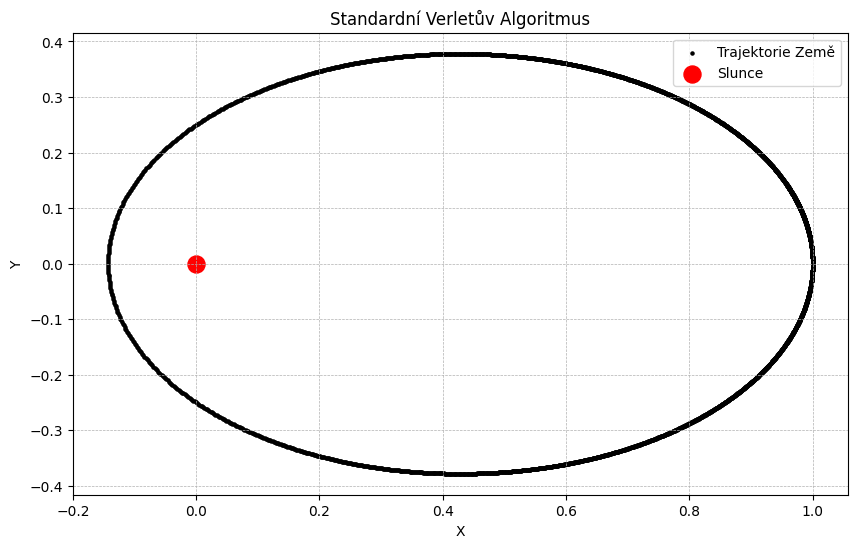

In [42]:
x,y = Verletuv_algoritmus(r_0,v_0, delta_t, celk_cas)
zobrazeni(x, y, nazev = "Standardní Verletův Algoritmus")

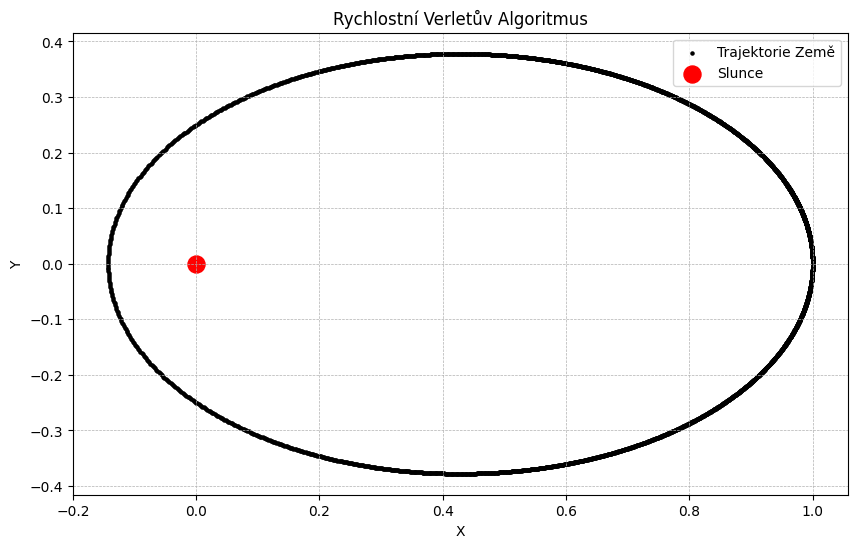

In [43]:
x, y = rychlostni_Verletuv_algoritmus(r_0,v_0, delta_t, celk_cas)
zobrazeni(x, y, nazev = "Rychlostní Verletův Algoritmus")